In [1]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install fake_useragent

Note: you may need to restart the kernel to use updated packages.


In [4]:
import requests
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import folium
import bs4
import json
from fake_useragent import UserAgent
from folium import plugins
import geopy.distance
import seaborn as sns
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
from concurrent.futures import ThreadPoolExecutor

**Web scrapping for Starbucks' location information**

In [62]:
url = 'https://www.starbucks.com/store-locator?map=33.40063,-111.83589,12z&place=Mesa,%20AZ,%20USA'
response = requests.get(url)

In [63]:
response.status_code

200

In [64]:
response.text

'<!DOCTYPE html>\n<html lang="en-US" class="no-js fonts-loading">\n\n  <head>\n    <meta charset="utf-8">\n    <meta http-equiv="x-ua-compatible" content="ie=edge">\n    <meta property="twitter:card" content="summary">\n    <meta property="twitter:site" content="@starbucks">\n    <meta property="twitter:creator" content="@starbucksprtnrs">\n    <meta property="og:title" content="Starbucks®">\n    <meta property="og:image" data-hid="image" content="https://app.starbucks.com/weblx/images/social/summary_square.png">\n    <meta property="twitter:image" data-hid="twitter:image" content="https://app.starbucks.com/weblx/images/social/summary_image.png">\n    \n    <meta name="viewport" content="width=device-width, initial-scale=1, user-scalable=no">\n    <script src=\'/vendor/static/vendor2.js\'></script>\n    <script type=\'text/javascript\'>window.NREUM||(NREUM={});NREUM.info = {"agent":"","beacon":"bam.nr-data.net","errorBeacon":"bam.nr-data.net","licenseKey":"671cca5e0f","applicationID":"

In [65]:
re.findall(r'"coordinates":\{"latitude":(.*?)\,"longitude":(.*?)\}', response.text)

[('33.42215', '-111.80561'),
 ('33.3919', '-111.84055'),
 ('33.38193', '-111.83969'),
 ('33.41624', '-111.87373'),
 ('33.39201', '-111.86472'),
 ('33.43459', '-111.86929'),
 ('33.38089', '-111.80617'),
 ('33.39249', '-111.78891'),
 ('33.45035', '-111.80334'),
 ('33.37848', '-111.85927'),
 ('33.39326', '-111.87846'),
 ('33.37716', '-111.79124'),
 ('33.37871', '-111.78874'),
 ('33.45106', '-111.78737'),
 ('33.36394', '-111.82396'),
 ('33.36315', '-111.85984'),
 ('33.36408', '-111.78927'),
 ('33.4296', '-111.90523'),
 ('33.36441', '-111.87704'),
 ('33.42393', '-111.75192'),
 ('33.39381', '-111.90862'),
 ('33.39402', '-111.75418'),
 ('33.39483', '-111.75231'),
 ('33.34929', '-111.85862'),
 ('33.3793', '-111.90776'),
 ('33.38078', '-111.75342'),
 ('33.37937', '-111.91071'),
 ('33.40894', '-111.9251'),
 ('33.4097', '-111.92579'),
 ('33.3369', '-111.80885'),
 ('33.4171', '-111.73501'),
 ('33.39392', '-111.92458'),
 ('33.41605', '-111.92826'),
 ('33.4344', '-111.92601'),
 ('33.33603', '-111.80

In [69]:
maricopa_zips = pd.read_csv('C:/Users/jaena/OneDrive/Desktop/Personal Project/Starbucks/Maricopa_zip.csv')

In [70]:
maricopa_zips.head(n=10)

State    Zip     City
0    AZ  85001  Phoenix
1    AZ  85002  Phoenix
2    AZ  85003  Phoenix
3    AZ  85004  Phoenix
4    AZ  85005  Phoenix
5    AZ  85006  Phoenix
6    AZ  85007  Phoenix
7    AZ  85008  Phoenix
8    AZ  85009  Phoenix
9    AZ  85010  Phoenix

In [71]:
star_coord =[]
#starbucks_info =[]

In [72]:
def get_store_lat_lngs(zcode):
    request = f'https://www.starbucks.com/store-locator?place={zcode}'
    response = requests.get(request)
    s_lat_lngs = re.findall(r'"coordinates":\{"latitude":(.*?)\,"longitude":(.*?)\}', response.text)
    s_lat_lngs = [(float(item[0]), float(item[1])) for item in s_lat_lngs]
    return s_lat_lngs

In [73]:
for i, zcode in enumerate(maricopa_zips.Zip.values):
    print(f'{i} / {len(maricopa_zips)}')
    star_coord += get_store_lat_lngs(zcode)

0 / 200
1 / 200
2 / 200
3 / 200
4 / 200
5 / 200
6 / 200
7 / 200
8 / 200
9 / 200
10 / 200
11 / 200
12 / 200
13 / 200
14 / 200
15 / 200
16 / 200
17 / 200
18 / 200
19 / 200
20 / 200
21 / 200
22 / 200
23 / 200
24 / 200
25 / 200
26 / 200
27 / 200
28 / 200
29 / 200
30 / 200
31 / 200
32 / 200
33 / 200
34 / 200
35 / 200
36 / 200
37 / 200
38 / 200
39 / 200
40 / 200
41 / 200
42 / 200
43 / 200
44 / 200
45 / 200
46 / 200
47 / 200
48 / 200
49 / 200
50 / 200
51 / 200
52 / 200
53 / 200
54 / 200
55 / 200
56 / 200
57 / 200
58 / 200
59 / 200
60 / 200
61 / 200
62 / 200
63 / 200
64 / 200
65 / 200
66 / 200
67 / 200
68 / 200
69 / 200
70 / 200
71 / 200
72 / 200
73 / 200
74 / 200
75 / 200
76 / 200
77 / 200
78 / 200
79 / 200
80 / 200
81 / 200
82 / 200
83 / 200
84 / 200
85 / 200
86 / 200
87 / 200
88 / 200
89 / 200
90 / 200
91 / 200
92 / 200
93 / 200
94 / 200
95 / 200
96 / 200
97 / 200
98 / 200
99 / 200
100 / 200
101 / 200
102 / 200
103 / 200
104 / 200
105 / 200
106 / 200
107 / 200
108 / 200
109 / 200
110 / 200


In [74]:
star_coord = set(star_coord)

In [75]:
star_coord = list(star_coord)
star_coord

[(33.2956, -111.89977),
 (33.77945, -111.92272),
 (33.44941, -112.07268),
 (33.64205, -112.22345),
 (33.36642, -111.47497),
 (33.21776, -111.79091),
 (33.51102, -112.08537),
 (33.4305, -111.93402),
 (33.79718, -111.97513),
 (33.3793, -111.90776),
 (33.42281, -111.94082),
 (33.57361, -111.7185),
 (33.49543, -112.02114),
 (33.46848, -112.39301),
 (33.22128, -111.63186),
 (33.44215, -111.95559),
 (33.68052, -112.23961),
 (33.5244, -112.13103),
 (33.46603, -112.2213),
 (33.67801, -111.97782),
 (33.62668, -111.88884),
 (33.50913, -112.08249),
 (33.16069, -111.56037),
 (33.33573, -111.60228),
 (33.38062, -111.60077),
 (33.54426, -111.90527),
 (33.31667, -112.00542),
 (33.33882, -111.60508),
 (33.25013, -111.83814),
 (33.68399, -111.96627),
 (33.33397, -111.75737),
 (33.61116, -112.18527),
 (33.48054, -112.04231),
 (33.50896, -112.34149),
 (33.7133, -112.14193),
 (33.43594, -111.72116),
 (33.642, -112.06499),
 (33.42562, -111.94014),
 (33.58158, -112.12745),
 (33.39053, -112.13429),
 (33.4820

In [76]:
len(star_coord)

399

**Dutch Bros location information**

In [77]:
dutch =pd.read_csv('C:/Users/jaena/OneDrive/Desktop/Personal Project/Starbucks/Dutch_Bros.csv')

In [78]:
dutch["Full_Address"] = dutch["Address"].astype(str)+", "+dutch["City"]+", "+ dutch["State"]+" "+ dutch["Zip"].astype(str)

In [79]:
coordinate = dutch["Full_Address"].tolist()
print(coordinate)

['4433 N 7th Street, Phoenix, AZ 85014', '3045 E. Indian School Rd, Phoenix, AZ 85016', '1201 E. Glendale Ave., Phoenix, AZ 85020', '605 W. Bell Road, Phoenix, AZ 85023', '2961 E. Bell Rd, Phoenix, AZ 85032', '12629 N. Paradise Village Pkwy, Phoenix, AZ 85032', '3215 E Chandler Blvd, Phoenix, AZ 85048', '20232 N John Wayne Pkwy, Maricopa, AZ 85139', '20898 E. Queen Creek Rd, Queen Creek, AZ 85142', '20710 E Riggs Rd, Queen Creek, AZ 85142', '1822 E McKellips Rd, Mesa, AZ 85203', '1960 E. McKellips Rd., Mesa, AZ 85203', '1136 S. Greenfield Rd., Mesa, AZ 85206', '1448 S Crismon Rd., Mesa, AZ 85209', '2709 S Signal Butte Rd., Mesa, AZ 85209', '1326 S. Alma School Rd, Mesa, AZ 85210', '3665 W Chandler Blvd, Chandler, AZ 85226', '722 N. McQueen Rd., Gilbert, AZ 85233', '459 N. Gilbert Rd, Gilbert, AZ 85234', '8975 N 90th St, Scottsdale, AZ 85250', '6235 E. Bell Rd., Scottsdale, AZ 85254', '20795 N. Scottsdale Rd., Scottsdale, AZ 85255', '2012 N Scottsdale Rd, Scottsdale, AZ 85257', '15600 N

In [80]:
from geopy.geocoders import ArcGIS
import geopandas as gpd
from geopandas.tools import geocode

In [81]:
nom = ArcGIS()

In [82]:
dutch_coord = geocode(coordinate, provider='bing', api_key ='AlS0uxqoiGLOyuLIgovCp_CLqIwEOyHkHxMNu46nCtGLD9m1wFq-oDp6SIlumfeJ') 

In [83]:
dutch_coord.head(n=50)

geometry  \
0   POINT (-112.06461 33.50089)   
1   POINT (-112.01600 33.49486)   
2   POINT (-112.05600 33.53803)   
3   POINT (-112.08114 33.63981)   
4   POINT (-112.01802 33.64034)   
5   POINT (-111.98811 33.60217)   
6   POINT (-112.01347 33.30458)   
7   POINT (-112.04861 33.06314)   
8   POINT (-111.63258 33.26364)   
9   POINT (-111.63647 33.22016)   
10  POINT (-111.79111 33.45210)   
11  POINT (-111.78803 33.45201)   
12  POINT (-111.73709 33.39482)   
13  POINT (-111.61607 33.38830)   
14  POINT (-111.60086 33.36591)   
15  POINT (-111.85773 33.39057)   
16  POINT (-111.90518 33.30510)   
17  POINT (-111.82498 33.36297)   
18  POINT (-111.78804 33.35860)   
19  POINT (-111.88649 33.56775)   
20  POINT (-111.94523 33.63998)   
21  POINT (-111.92464 33.67575)   
22  POINT (-111.92733 33.46985)   
23  POINT (-111.89701 33.62776)   
24  POINT (-111.71807 33.60837)   
25  POINT (-111.92603 33.41698)   
26  POINT (-111.93937 33.39402)   
27  POINT (-111.92837 33.36283)   
28  POINT (-111.75586 33.28386)   
29  POINT (-112.18345 33.63927)   
30  POINT (-112.13670 33.71351)   
31  POINT (-112.30595 33.45454)   
32  POINT (-112.55593 33.43763)   
33  POINT (-111.96637 33.79595)   
34  POINT (-112.39299 33.45296)   
35  POINT (-112.23824 33.46419)   
36  POINT (-112.35829 33.63820)   
37  POINT (-112.39266 33.62409)   
38  POINT (-112.23992 33.60966)   
39  POINT (-112.42447 33.61022)   
40  POINT (-112.50378 33.46809)   
41  POINT (-111.78885 33.26232)   
42  POINT (-111.72196 33.32540)   
43  POINT (-111.68634 33.31620)   
44  POINT (-111.71916 33.38329)   
45  POINT (-112.36354 33.48638)   
46  POINT (-112.39299 33.45296)   
47  POINT (-112.35839 33.60588)   
48  POINT (-112.23693 33.61129)   

                                              address  
0     4433 N 7th St, Phoenix, AZ 85014, United States  
1   3045 E Indian School Rd, Phoenix, AZ 85016, Un...  
2   1201 E Glendale Ave, Phoenix, AZ 85020, United...  
3     605 W Bell Rd, Phoenix, AZ 85023, United States  
4    2961 E Bell Rd, Phoenix, AZ 85032, United States  
5   12629 N Paradise Village Pkwy, Phoenix, AZ 850...  
6   3215 E Chandler Blvd, Phoenix, AZ 85048, Unite...  
7   20232 N John Wayne Pkwy, Maricopa, AZ 85139, U...  
8   20898 E Queen Creek Rd, Queen Creek, AZ 85142,...  
9   20710 E Riggs Rd, Queen Creek, AZ 85142, Unite...  
10  1822 E McKellips Rd, Mesa, AZ 85203, United St...  
11  1960 E McKellips Rd, Mesa, AZ 85203, United St...  
12  1136 S Greenfield Rd, Mesa, AZ 85206, United S...  
13   1448 S Crismon Rd, Mesa, AZ 85209, United States  
14  2709 S Signal Butte Rd, Mesa, AZ 85209, United...  
15  1326 S Alma School Rd, Mesa, AZ 85210, United ...  
16  3665 W Chandler Blvd, Chandler, AZ 85226, Unit...  
17  722 N McQueen Rd, Gilbert, AZ 85233, United St...  
18  459 N Gilbert Rd, Gilbert, AZ 85234, United St...  
19  8975 N 90th St, Scottsdale, AZ 85258, United S...  
20  6235 E Bell Rd, Scottsdale, AZ 85254, United S...  
21  20795 N Scottsdale Rd, Scottsdale, AZ 85255, U...  
22  2012 N Scottsdale Rd, Scottsdale, AZ 85257, Un...  
23  15600 N Hayden Rd, Scottsdale, AZ 85260, Unite...  
24  16760 E Palisades Blvd, Fountain Hills, AZ 852...  
25    1037 S Rural Rd, Tempe, AZ 85281, United States  
26    3213 S Mill Ave, Tempe, AZ 85282, United States  
27    6461 S Rural Rd, Tempe, AZ 85283, United States  
28  3670 S Val Vista Dr, Gilbert, AZ 85297, United...  
29  5724 W Bell Rd, Glendale, AZ 85308, United States  
30  3580 W Happy Valley Rd, Glendale, AZ 85310, Un...  
31  888 N 114th Ave, Avondale, AZ 85323, United St...  
32  1005 S Watson Rd, Buckeye, AZ 85326, United St...  
33  34350 N Cave Creek Rd, Cave Creek, AZ 85331, U...  
34  580 N Estrella Pkwy, Goodyear, AZ 85338, Unite...  
35  8301 W Lynwood St, Tolleson, AZ 85353, United ...  
36  13855 W Bell Rd, Surprise, AZ 85374, United St...  
37  15432 W Greenway Rd, Surprise, AZ 85374, Unite...  
38  8387 W Thunderbird Rd, Peoria, AZ 85381, Unite...  
39  16986 W Waddell Rd, Surprise

In [84]:
dutch_coord_list =[[point.xy[1][0], point.xy[0][0]] for point in dutch_coord.geometry]
dutch_coord_list

[[33.500889, -112.064608],
 [33.494856, -112.016004],
 [33.538032, -112.056005],
 [33.639809, -112.081137],
 [33.640336, -112.018022],
 [33.602169, -111.988113],
 [33.304584, -112.013471],
 [33.063141, -112.048609],
 [33.26364, -111.632583],
 [33.22016, -111.636467],
 [33.452103, -111.791106],
 [33.452011, -111.788032],
 [33.39482, -111.737091],
 [33.388299, -111.616074],
 [33.365913, -111.600864],
 [33.390572, -111.857726],
 [33.305099, -111.905179],
 [33.36297, -111.824984],
 [33.3586, -111.78804],
 [33.567752, -111.88649],
 [33.639977, -111.945234],
 [33.675753, -111.92464],
 [33.469847, -111.927329],
 [33.627765, -111.897009],
 [33.608372, -111.718072],
 [33.416975, -111.926034],
 [33.394021, -111.939374],
 [33.362826, -111.928369],
 [33.283859, -111.755861],
 [33.639268, -112.183449],
 [33.713511, -112.136696],
 [33.454544, -112.305948],
 [33.437634, -112.555929],
 [33.79595, -111.966367],
 [33.452963, -112.392991],
 [33.46419, -112.238239],
 [33.6382, -112.358295],
 [33.624086, -

In [85]:
df_dutch = pd.DataFrame(dutch_coord_list, columns =["long", "lat"])
print(df_dutch)

         long         lat
0   33.500889 -112.064608
1   33.494856 -112.016004
2   33.538032 -112.056005
3   33.639809 -112.081137
4   33.640336 -112.018022
5   33.602169 -111.988113
6   33.304584 -112.013471
7   33.063141 -112.048609
8   33.263640 -111.632583
9   33.220160 -111.636467
10  33.452103 -111.791106
11  33.452011 -111.788032
12  33.394820 -111.737091
13  33.388299 -111.616074
14  33.365913 -111.600864
15  33.390572 -111.857726
16  33.305099 -111.905179
17  33.362970 -111.824984
18  33.358600 -111.788040
19  33.567752 -111.886490
20  33.639977 -111.945234
21  33.675753 -111.924640
22  33.469847 -111.927329
23  33.627765 -111.897009
24  33.608372 -111.718072
25  33.416975 -111.926034
26  33.394021 -111.939374
27  33.362826 -111.928369
28  33.283859 -111.755861
29  33.639268 -112.183449
30  33.713511 -112.136696
31  33.454544 -112.305948
32  33.437634 -112.555929
33  33.795950 -111.966367
34  33.452963 -112.392991
35  33.464190 -112.238239
36  33.638200 -112.358295
37  33.62408

In [86]:
df_star = pd.DataFrame(star_coord, columns =["long", "lat"])
print(df_star)

         long        lat
0    33.29560 -111.89977
1    33.77945 -111.92272
2    33.44941 -112.07268
3    33.64205 -112.22345
4    33.36642 -111.47497
..        ...        ...
394  33.49618 -112.48162
395  33.31941 -111.92721
396  33.23240 -111.72295
397  33.56728 -112.18664
398  33.34956 -111.96465

[399 rows x 2 columns]


**Calculation for measuring distance of stores by using Haversine function**

In [87]:
import math                                  
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    You can find this function here:
    https://gis.stackexchange.com/a/56589/15183
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(math.radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.asin(math.sqrt(a)) 
    km = 6367 * c
    return km

In [88]:
nearest_dutch_star=np.zeros(len(df_dutch))
for i in range(0,len(df_dutch)):
    lon1, lat1 = df_dutch.iloc[i].long, df_dutch.iloc[i].lat
    min_dist=9999.0
    for j in range(0,len(df_star)):
        lon2, lat2 = df_star.iloc[j].long, df_star.iloc[j].lat
        dist=haversine(lon1, lat1, lon2, lat2)
        if dist < min_dist:
            min_dist=dist
    nearest_dutch_star[i]= min_dist
nearest_dutch_star

array([0.22129579, 0.57123935, 0.71123507, 1.36338622, 0.74454123,
       0.15917813, 1.0265311 , 0.40515777, 0.60887675, 0.28305019,
       0.41738665, 0.083369  , 0.44344188, 0.2058125 , 0.29415432,
       0.52889371, 0.7185672 , 0.12064199, 0.26415108, 0.30860999,
       0.63421296, 0.97872168, 0.51220369, 0.06111937, 1.14004166,
       0.25032498, 1.06665986, 0.84490294, 0.98458738, 0.60773944,
       0.53698934, 0.86217551, 0.29741219, 0.16852826, 0.13298493,
       1.83281146, 0.51051899, 0.67474183, 0.56777956, 0.52933444,
       0.13188809, 0.64634507, 0.97534243, 0.40800845, 0.26365148,
       0.10639171, 0.13298493, 0.22324334, 0.23782456])

In [89]:
nearest_star_star=np.zeros(len(df_star))  #here are the first two lines
for i in range(0,len(df_star)):
    lon1, lat1 = df_star.iloc[i].long, df_star.iloc[i].lat
    min_dist=9999.0
    for j in range(0,len(df_dutch)):
        lon2, lat2 = df_star.iloc[j].long, df_star.iloc[j].lat
        
        #dist = haversine(lon1, lat1, lon2, lat2)-orginal
        if i!=j:
            dist = haversine(lon1, lat1, lon2, lat2)
            
        if dist < min_dist:
            min_dist = dist
    nearest_star_star[i] = min_dist
nearest_star_star

array([3.58159080e+00, 4.82688966e+00, 1.57783285e+00, 2.41680512e+00,
       1.26639942e+01, 6.90147949e-01, 3.29637501e-01, 7.09620047e-01,
       4.80782268e+00, 2.10430374e+00, 1.39007195e-01, 5.66923505e+00,
       2.43302365e+00, 5.97560106e+00, 5.65806305e+00, 1.82734660e+00,
       2.41680512e+00, 2.42641893e+00, 7.29203737e+00, 1.30735589e+00,
       2.66476763e+00, 3.29637501e-01, 8.32188852e+00, 3.35854163e-01,
       1.77597116e+00, 2.01993103e+00, 7.60929974e+00, 3.35854163e-01,
       5.29023275e+00, 1.30735589e+00, 2.49865164e+00, 4.43664433e+00,
       2.43302365e+00, 5.97560106e+00, 5.74509336e+00, 4.05470847e+00,
       5.87966552e+00, 1.39007195e-01, 2.42641893e+00, 5.61638263e+00,
       1.16857574e+00, 2.10430374e+00, 2.66476763e+00, 2.49865164e+00,
       6.90147949e-01, 3.52993938e+00, 3.85989037e+00, 2.01993103e+00,
       4.07230278e+00, 2.71110118e+00, 2.42188662e+00, 1.69356070e+00,
       4.87081337e-01, 2.84562679e+00, 1.21346409e+01, 1.04873669e-01,
      

**Median Distance**

In [90]:
np.median(nearest_star_star)

2.5305643476828976

In [91]:
np.median(nearest_dutch_star)

0.5105189858711672

**Statistics**

In [92]:
from scipy import stats     
stats.describe(nearest_star_star)

DescribeResult(nobs=399, minmax=(0.050866006769415724, 73.19210448523806), mean=3.4436002076417034, variance=26.973932203812005, skewness=8.798085673416514, kurtosis=99.69979030543348)

In [93]:
stats.describe(nearest_dutch_star)

DescribeResult(nobs=49, minmax=(0.061119368812639935, 1.8328114628708723), mean=0.5265100094282831, variance=0.138916942660185, skewness=1.169284851629878, kurtosis=1.583952754435761)

**Wilcoxon Rank Sums**
* A p-value that is less than 0.05 suggests that the two distributions are shifted relative to each other

In [107]:
from scipy.stats import ranksums  
ranksums(nearest_dutch_star,nearest_star_star)

RanksumsResult(statistic=-9.276892608718772, pvalue=1.7449319836120355e-20)

**Histogram**

Text(0.5, 1.0, 'Histogram of median distance (km) between Dutch Bros and Starbucks')

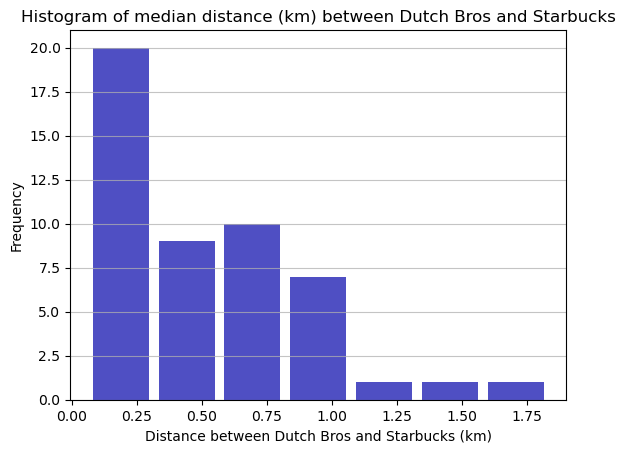

In [105]:

import matplotlib.pyplot as plt

n, bins, patches = plt.hist(x=nearest_dutch_star, bins = 'auto', color = '#0504aa',
                           alpha=0.7, rwidth=0.85)
plt.grid(axis = 'y', alpha = 0.75)
plt.xlabel('Distance between Dutch Bros and Starbucks (km)')
plt.ylabel('Frequency')
plt.title('Histogram of median distance (km) between Dutch Bros and Starbucks')

Text(0.5, 1.0, 'Histogram of median distance (km) between Starbucks and Starbucks')

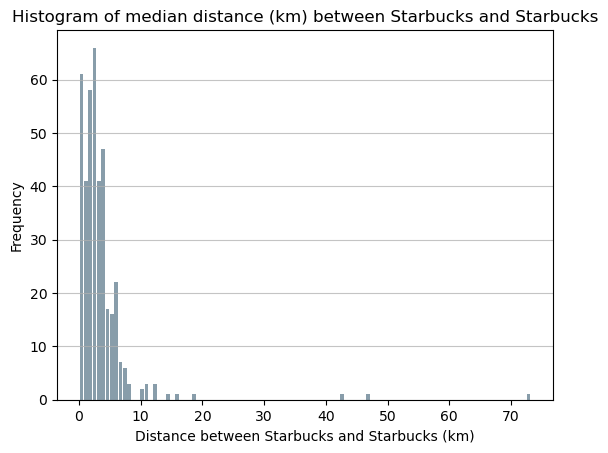

In [104]:
#second histogram here
n, bins, patches = plt.hist(x=nearest_star_star, bins='auto', color = '#607c8e',
                           alpha = 0.75, rwidth = 0.85)
plt.grid(axis = 'y', alpha =0.75)
plt.xlabel('Distance between Starbucks and Starbucks (km)')
plt.ylabel('Frequency')
plt.title('Histogram of median distance (km) between Starbucks and Starbucks')

**Mapping**

In [114]:
mapit = folium.Map(location=[33.40063, -111.83589], zoom_start=9,tiles ='OpenStreetMap')

for coords in star_coord:
    folium.CircleMarker(location=[coords[0], coords[1]],
                  radius=4, weight=2, color='green', fill_color='green', fill_opacity=0.7).add_to(mapit)
i=0
for coord in dutch_coord_list:
    folium.CircleMarker(location=[coord[0], coord[1]],
                       radius=4, weight=2, color='blue', fill_color='blue', fill_opacity=0.7).add_to(mapit)
mapit.save('Starbucks vs Dutch Bros.html')
mapit